## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Import Raw Data

In [2]:
df=pd.read_csv(r"C:\Users\KAILASH\Desktop\EVERCITY\DATA FOR INTERVIEW\PROJECT\blinkit\blinkit_data.csv")

##  Sample Data

In [3]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


##  Size of Dataset

In [4]:
print('taotal row and col no:',df.shape)

taotal row and col no: (8523, 12)


##  Types of Datatype

In [5]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

##  Total Columns 

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

## Data cleaning

In [7]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [8]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'low fat':'Low Fat',
                                                         'LF':'Low Fat',
                                                         'reg':'Regular'
                                                        })

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


##  KPI's Requirements

In [10]:
total_sale = df['Sales'].sum()
avg_sales =df['Sales'].mean()
no_of_items_sold =df['Sales'].count()
avg_ratings = df['Rating'].mean()
print(f"total_sale:${total_sale:,.0f}")
print(f"avg_sales:${avg_sales:,.0f}")
print(f"no_of_items_sold:${no_of_items_sold:,.0f}")
print(f"avg_ratings:${avg_ratings:,.0f}")

total_sale:$1,201,681
avg_sales:$141
no_of_items_sold:$8,523
avg_ratings:$4


##  CHARTS REQUIREMENTS

## Total Sales By Fat Content

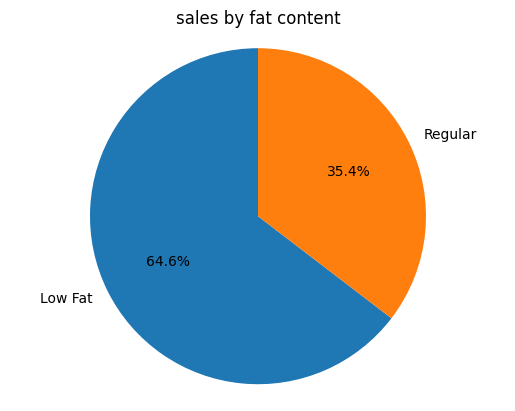

In [11]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels= sales_by_fat.index,autopct= "%.1f%%",startangle=90)
plt.title('sales by fat content')
plt.axis('equal')
plt.show()
        

## Total Sales by Item Type

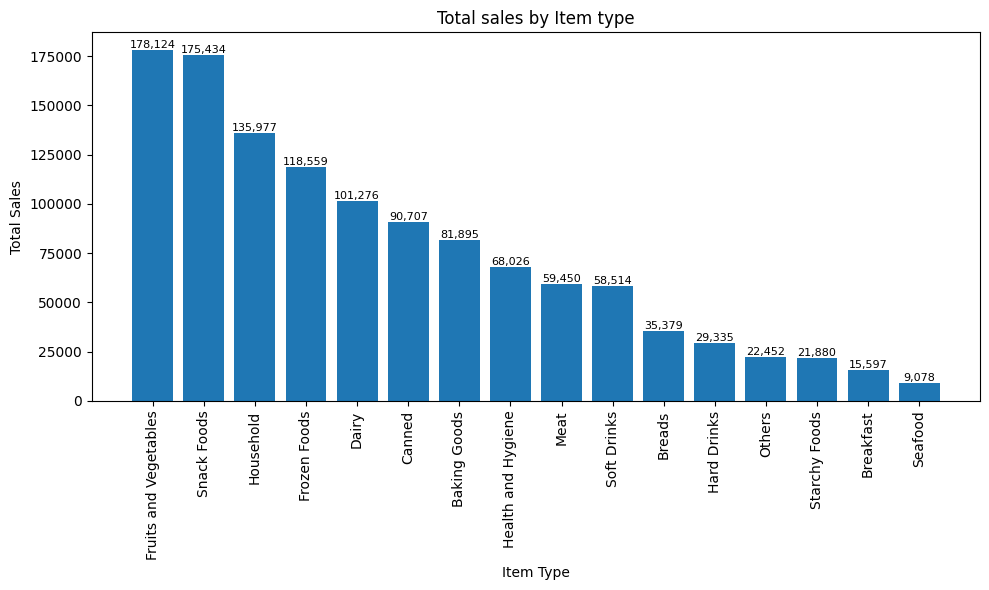

In [12]:
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total sales by Item type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() /2,bar.get_height(),f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

## Total Sales by Outlet Location

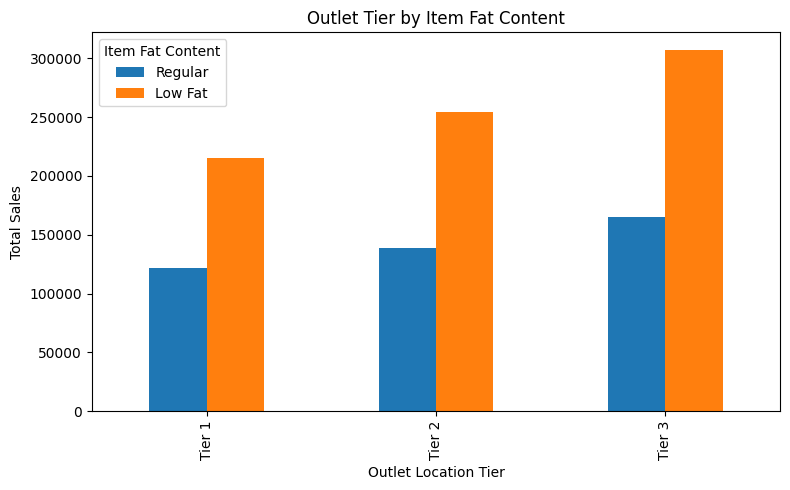

In [13]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

## Total Sales by Outlet Establishment

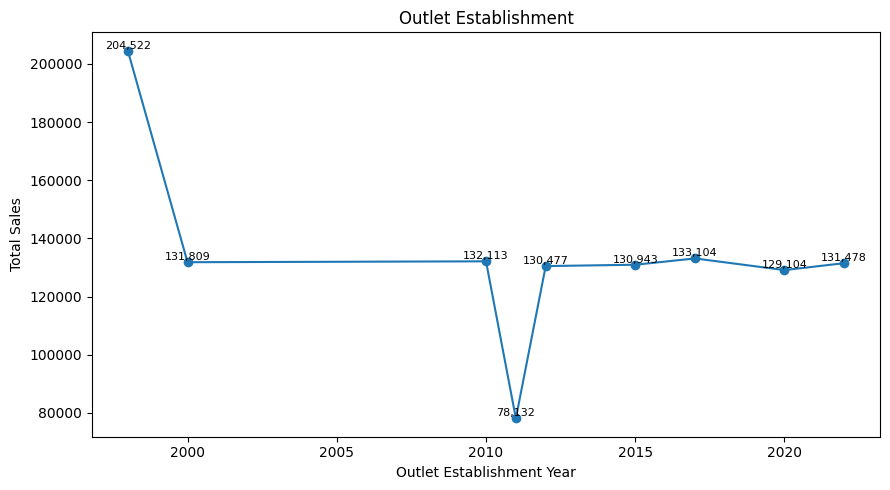

In [14]:
sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y, f'{y:,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

##  Sales by Outlet Size

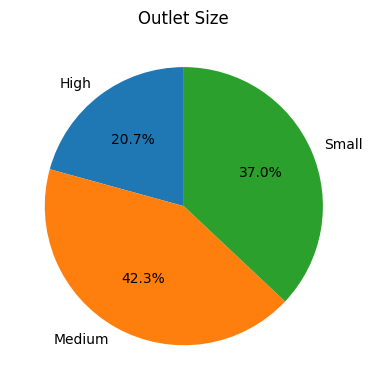

In [15]:
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

##  Sales by Outlet Location

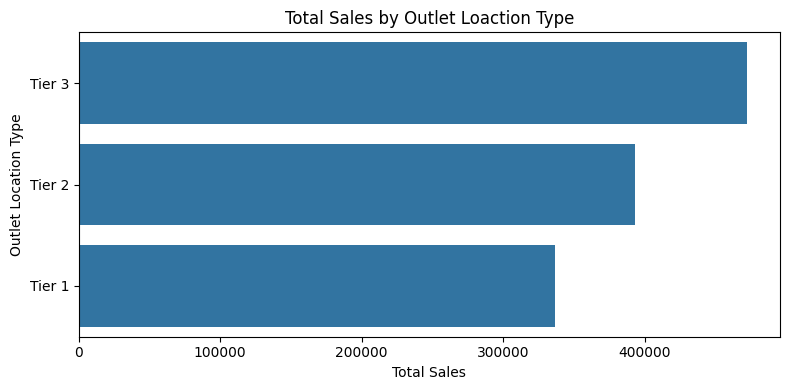

In [16]:
sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values(['Sales'],ascending=False)

plt.figure(figsize=(8,4))
ax=sns.barplot(x='Sales',y='Outlet Location Type',data=sales_by_location)

plt.title('Total Sales by Outlet Loaction Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()